<a href="https://colab.research.google.com/github/ttu1984wei/AI_practice/blob/main/CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import tensorflow as tf
import keras
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers import Dropout
from keras.utils import np_utils
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

In [ ]:
# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
#正規化
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
# One-hot編碼
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',
         input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(5, 5), padding='same',
          activation='relu'))#不需要input
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same',
          activation='relu'))#不需要input
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       102528    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 128)         0

filter of conv2d layer


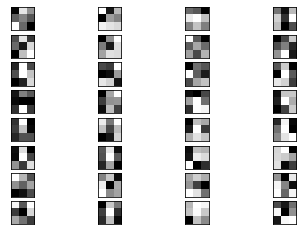

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
def plot_filters(layer,x,y):
    print('filter of {} layer'.format(layer.name))
    filters = layer.get_weights()[0]
    (w,h,_,n)=filters.shape
    for j in range(n):
        ax=plt.subplot(y,x,j+1)
        ax.imshow(filters[:,:,0,j],cmap='binary')
        plt.xticks([])
        plt.yticks([])
    plt.show()
    return plt

plot_filters(model.layers[0],4,8)  # 1st convolution layer

In [ ]:
#編譯模型
model.compile(loss='mse', #'categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),#'adam', 
              metrics=['accuracy'])

In [ ]:
#訓練模型
history = model.fit(x_train, y_train, validation_split=0.1, 
                    epochs=20, batch_size=128, verbose=2)

Epoch 1/20
352/352 - 16s - loss: 0.0778 - accuracy: 0.3342 - val_loss: 0.0640 - val_accuracy: 0.4972 - 16s/epoch - 45ms/step
Epoch 2/20
352/352 - 3s - loss: 0.0632 - accuracy: 0.5034 - val_loss: 0.0526 - val_accuracy: 0.6034 - 3s/epoch - 9ms/step
Epoch 3/20
352/352 - 3s - loss: 0.0558 - accuracy: 0.5781 - val_loss: 0.0480 - val_accuracy: 0.6404 - 3s/epoch - 9ms/step
Epoch 4/20
352/352 - 3s - loss: 0.0509 - accuracy: 0.6194 - val_loss: 0.0438 - val_accuracy: 0.6802 - 3s/epoch - 10ms/step
Epoch 5/20
352/352 - 3s - loss: 0.0475 - accuracy: 0.6485 - val_loss: 0.0425 - val_accuracy: 0.6888 - 3s/epoch - 9ms/step
Epoch 6/20
352/352 - 3s - loss: 0.0445 - accuracy: 0.6746 - val_loss: 0.0384 - val_accuracy: 0.7238 - 3s/epoch - 10ms/step
Epoch 7/20
352/352 - 4s - loss: 0.0421 - accuracy: 0.6935 - val_loss: 0.0393 - val_accuracy: 0.7204 - 4s/epoch - 12ms/step
Epoch 8/20
352/352 - 3s - loss: 0.0401 - accuracy: 0.7118 - val_loss: 0.0360 - val_accuracy: 0.7402 - 3s/epoch - 9ms/step
Epoch 9/20
352/352

In [ ]:
#評估模型
print('\nTesting ...')
loss, accuracy = model.evaluate(x_train, y_train)
print('訓練資料集的準確度= {:.2f}'.format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test)
print('測試資料集的準確度= {:.2f}'.format(accuracy))


Testing ...
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0180 - accuracy: 0.8789
訓練資料集的準確度= 0.88
313/313 [==============================] - 1s 3ms/step - loss: 0.0326 - accuracy: 0.7723
測試資料集的準確度= 0.77


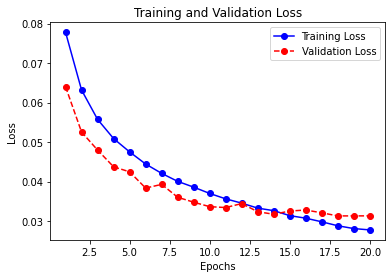

In [ ]:
#顯示訓練和驗證損失
loss = history.history['loss']
epochs = range(1, len(loss)+1)
val_loss = history.history['val_loss']
plt.plot(epochs, loss, "bo-", label='Training Loss')
plt.plot(epochs, val_loss, "ro--", label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

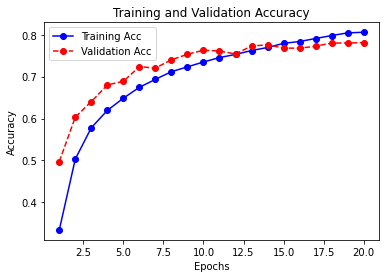

In [ ]:
#顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
model.save('cifar10.h5')#儲存模型